<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/SuperAI_SS4_TF_PT_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

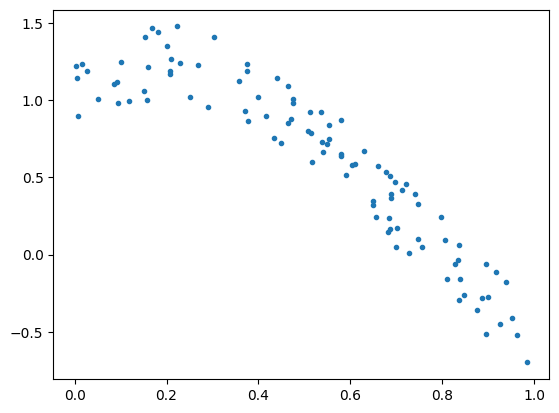

In [ ]:
N = 100
x = np.random.rand(N, 1)
y = np.sin(3 * x + 1) + .5 * np.random.rand(N, 1)
plt.plot(x[:, 0], y[:, 0], '.')
plt.show()

In [ ]:
import tensorflow as tf

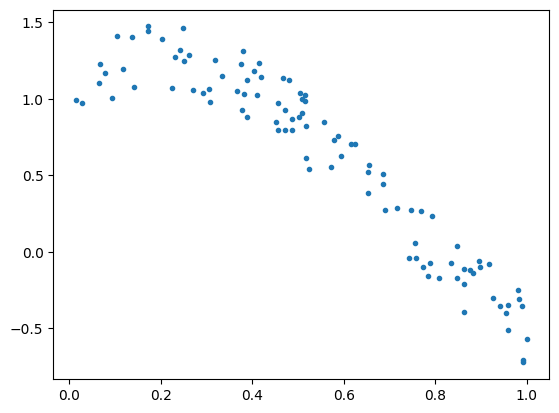

In [ ]:
N = 100
x = tf.random.uniform((N, 1))
y = tf.sin(3 * x + 1) + .5 * tf.random.uniform((N, 1))
plt.plot(x[:, 0], y[:, 0], '.')
plt.show()

# TF GradientTape

In [ ]:
# MLP [1, 32, 16, 1]

w1 = tf.Variable(tf.random.normal((1, 32)))
b1 = tf.Variable(tf.random.normal((32,)))
w2 = tf.Variable(tf.random.normal((32, 16)))
b2 = tf.Variable(tf.random.normal((16,)))
w3 = tf.Variable(tf.random.normal((16, 1)))
b3 = tf.Variable(tf.random.normal((1,)))

def model(x):
  x = tf.sigmoid(x @ w1 + b1)
  x = tf.sigmoid(x @ w2 + b2)
  return x @ w3 + b3

def mse(p, t):
  e = p - t
  return tf.reduce_mean(e * e)

lr = 0.1
for epoch in range(1, 3001):
  with tf.GradientTape() as t:
    p = model(x)
    loss = mse(p, y)
  if epoch % 1000 == 0:
    print(epoch, loss.numpy())
  dw1, db1, dw2, db2, dw3, db3 = t.gradient(loss, [w1, b1, w2, b2, w3, b3])
  w1.assign_sub(dw1 * lr)
  b1.assign_sub(db1 * lr)
  w2.assign_sub(dw2 * lr)
  b2.assign_sub(db2 * lr)
  w3.assign_sub(dw3 * lr)
  b3.assign_sub(db3 * lr)

1000 0.025745148
2000 0.022350883
3000 0.021218019


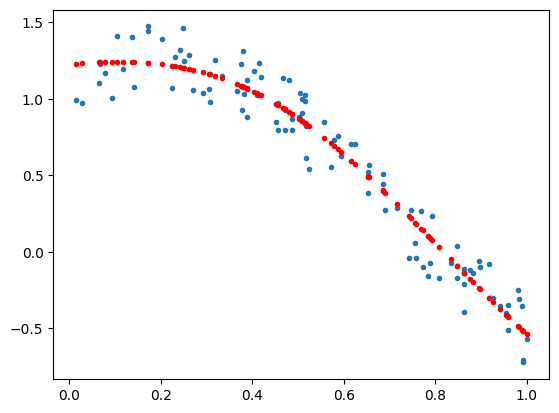

In [ ]:
z = model(x).numpy()

plt.plot(x[:, 0], y[:, 0], '.')
plt.plot(x[:, 0], z[:, 0], '.r')
plt.show()

# TF Keras

## Sequential

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input

In [ ]:
model = keras.Sequential([
    Input((1,)),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1),
])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(0.1))

In [ ]:
model.fit(x, y, epochs=3000)

4/4 [==============================] - 0s 4ms/step


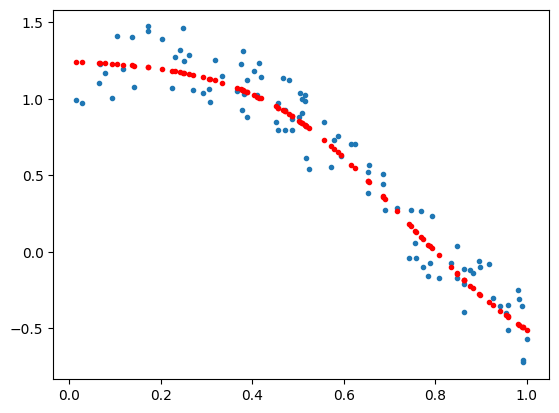

In [ ]:
z = model.predict(x)

plt.plot(x[:, 0], y[:, 0], '.')
plt.plot(x[:, 0], z[:, 0], '.r')
plt.show()

## Model

In [ ]:
inputs = Input((1,))
fc1 = Dense(32, activation='sigmoid')
fc2 = Dense(16, activation='sigmoid')
fc3 = Dense(1)
outputs = fc3(fc2(fc1(inputs))) # <=============
model = keras.Model(inputs, outputs)
model.compile(loss='mse', optimizer=keras.optimizers.SGD(0.1))

In [ ]:
model.fit(x, y, epochs=3000, verbose=0)

4/4 [==============================] - 0s 4ms/step


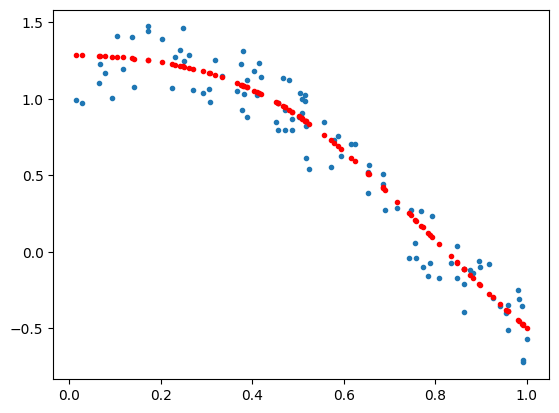

In [ ]:
z = model.predict(x)

plt.plot(x[:, 0], y[:, 0], '.')
plt.plot(x[:, 0], z[:, 0], '.r')
plt.show()

In [ ]:
type((1))

int

In [ ]:
type((1,))

tuple

# PT

In [ ]:
import torch

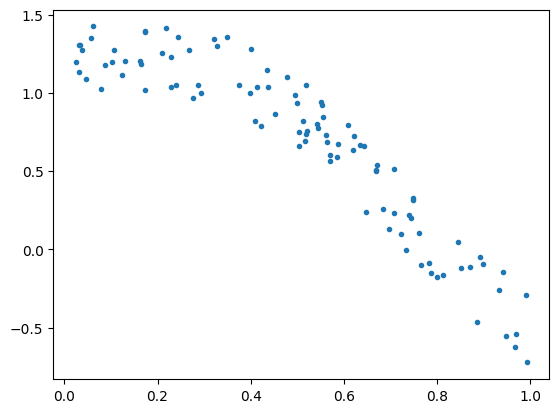

In [ ]:
N = 100
x = torch.rand(N, 1)
y = torch.sin(3 * x + 1) + .5 * torch.rand(N, 1)
plt.plot(x[:, 0], y[:, 0], '.')
plt.show()

In [ ]:
# MLP [1, 32, 16, 1]

w1 = torch.randn(1, 32, requires_grad=True)
b1 = torch.randn(32, requires_grad=True)
w2 = torch.randn(32, 16, requires_grad=True)
b2 = torch.randn(16, requires_grad=True)
w3 = torch.randn(16, 1, requires_grad=True)
b3 = torch.randn(1, requires_grad=True)

def model(x):
  x = torch.sigmoid(x @ w1 + b1)
  x = torch.sigmoid(x @ w2 + b2)
  return x @ w3 + b3

def mse(p, t):
  e = p - t
  return torch.mean(e * e)

lr = 0.1
for epoch in range(1, 3001):
  p = model(x)
  loss = mse(p, y)
  if epoch % 1000 == 0:
    print(epoch, loss.item())
  loss.backward()
  with torch.no_grad():
    w1 -= w1.grad * lr
    b1 -= b1.grad * lr
    w2 -= w2.grad * lr
    b2 -= b2.grad * lr
    w3 -= w3.grad * lr
    b3 -= b3.grad * lr
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()
    w3.grad.zero_()
    b3.grad.zero_()

1000 0.025308098644018173
2000 0.022180011495947838
3000 0.021422185003757477


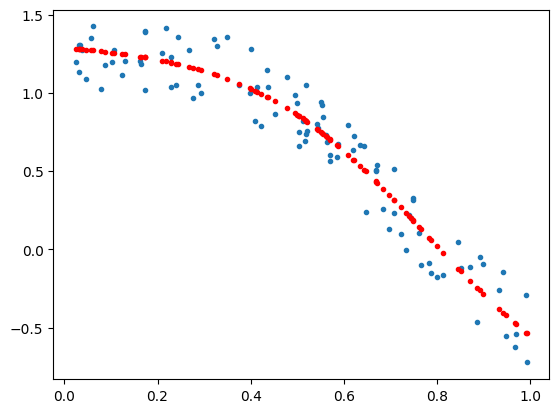

In [ ]:
with torch.no_grad():
  z = model(x).numpy()

plt.plot(x[:, 0], y[:, 0], '.')
plt.plot(x[:, 0], z[:, 0], '.r')
plt.show()

## Sequential

In [ ]:
from torch import nn

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Sigmoid(),
    nn.Linear(32, 16),
    nn.Sigmoid(),
    nn.Linear(16, 1),
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

epochs = 3000
model.train()
for epoch in range(1, epochs + 1):
  z = model(x)
  loss = loss_fn(z, y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(epoch, loss.item())

1000 0.04876586049795151
2000 0.039372704923152924
3000 0.03167309612035751


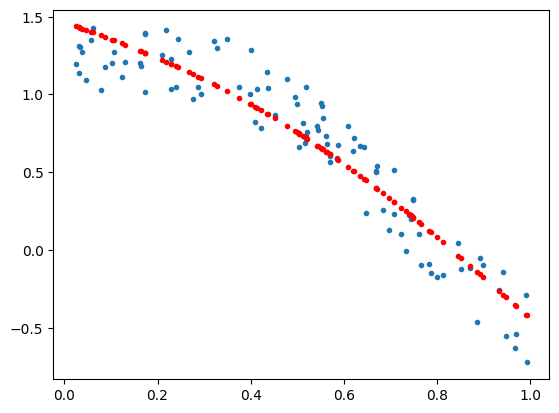

In [ ]:
model.eval()
with torch.no_grad():
  z = model(x)
  z = z.numpy()
plt.plot(x[:, 0], y[:, 0], '.')
plt.plot(x[:, 0], z[:, 0], '.r')
plt.show()

## Module

In [ ]:
class Regressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1, 32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, 1)

  def forward(self, x):
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    return self.fc3(x)

In [ ]:
model = Regressor()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

epochs = 3000
model.train()
for epoch in range(1, epochs + 1):
  z = model(x)
  loss = loss_fn(z, y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(epoch, loss.item())

1000 0.04920649155974388
2000 0.03940216451883316
3000 0.03165949881076813


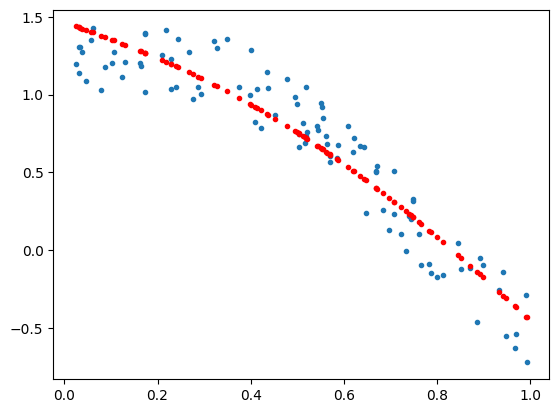

In [ ]:
model.eval()
with torch.no_grad():
  z = model(x)
  z = z.numpy()
plt.plot(x[:, 0], y[:, 0], '.')
plt.plot(x[:, 0], z[:, 0], '.r')
plt.show()

# DataLoader

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [ ]:
type(x)

torch.Tensor

In [ ]:
train_dataloader = DataLoader(TensorDataset(x, y), batch_size=16)

In [ ]:
for x_, y_ in train_dataloader:
  print(x_.shape, y_.shape)

torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([4, 1]) torch.Size([4, 1])


# custom dataset

In [ ]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __getitem__(self, i):
    return self.x[i], self.y[i]

  def __len__(self):
    return len(self.x)

In [ ]:
train_dataset = MyDataset(x, y)
train_dataloader = DataLoader(train_dataset, batch_size=16)

# openimages

In [ ]:
!pip install openimages

In [ ]:
from openimages.download import download_images

In [ ]:
!mkdir dataset
!touch dataset/exclusions.txt

In [ ]:
download_images('dataset', ["Dog", "Cat"], 'dataset/exclusions.txt', limit=100)

In [ ]:
import glob

In [ ]:
len(glob.glob('dataset/dog/images/*.jpg'))

100

In [ ]:
len(glob.glob('dataset/cat/images/*.jpg'))

100

In [ ]:
from PIL import Image
import os

class DognCat(Dataset):
  def __init__(self, path, transform=None):
    self.fn = glob.glob(os.path.join(path, '**/*.jpg'), recursive=True)
    self.transform = transform
    self.labels = [f.split(os.sep)[-1] for f in glob.glob(os.path.join('dataset', '*')) if os.path.isdir(f)]

  def __getitem__(self, i):
    x = Image.open(self.fn[i]).convert('RGB')
    if self.transform is not None:
      x = self.transform(x)
    y = self.labels.index(self.fn[i].split(os.sep)[1])
    return x, y

  def __len__(self):
    return len(self.fn)

In [ ]:
dataset = DognCat('dataset')

In [ ]:
next(iter(dataset))

(<PIL.Image.Image image mode=RGB size=1024x768>, 0)

In [ ]:
iter_dataset = iter(dataset)

In [ ]:
x, y = next(iter_dataset)
plt.imshow(x)
plt.title(y)
plt.show()

# transform

In [ ]:
from torchvision import transforms
from torchvision.transforms import v2

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
dataset = DognCat('dataset', transform)

In [ ]:
iter_dataset = iter(dataset)
x, y = next(iter_dataset)
x

Image([[[0.2824, 0.2863, 0.2941,  ..., 0.4549, 0.4588, 0.4588],
        [0.1922, 0.1882, 0.2078,  ..., 0.4627, 0.4667, 0.4667],
        [0.1529, 0.1490, 0.1647,  ..., 0.4706, 0.4667, 0.4706],
        ...,
        [0.1176, 0.1294, 0.1059,  ..., 0.2157, 0.1922, 0.2078],
        [0.1059, 0.1216, 0.1059,  ..., 0.1882, 0.1843, 0.1843],
        [0.0941, 0.0902, 0.1020,  ..., 0.2039, 0.1843, 0.1725]],

       [[0.3882, 0.3843, 0.3608,  ..., 0.2588, 0.2627, 0.2627],
        [0.2824, 0.2824, 0.2863,  ..., 0.2706, 0.2706, 0.2706],
        [0.1686, 0.1765, 0.1765,  ..., 0.2784, 0.2745, 0.2784],
        ...,
        [0.1333, 0.1451, 0.1333,  ..., 0.3059, 0.2980, 0.3176],
        [0.1176, 0.1373, 0.1333,  ..., 0.2706, 0.2784, 0.2863],
        [0.1020, 0.1059, 0.1294,  ..., 0.2863, 0.2784, 0.2706]],

       [[0.4824, 0.4667, 0.4000,  ..., 0.0549, 0.0588, 0.0627],
        [0.3451, 0.3569, 0.3529,  ..., 0.0588, 0.0588, 0.0588],
        [0.1765, 0.2039, 0.2157,  ..., 0.0588, 0.0549, 0.0588],
        ..

In [ ]:
transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

# einops

In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
import einops

In [ ]:
cat = plt.imread('/content/dataset/cat/images/0008ab3d8674f6ca.jpg')
dog = plt.imread('/content/dataset/dog/images/0012d875044bfa35.jpg')

In [ ]:
cat.shape

(1024, 768, 3)

In [ ]:
dog.shape

(576, 1024, 3)

In [ ]:
import cv2

In [ ]:
cat = cv2.resize(cat, (600, 800))
dog = cv2.resize(dog, (600, 800))

In [ ]:
cat.shape

(800, 600, 3)

In [ ]:
dog.shape

(800, 600, 3)

In [ ]:
image = np.array([cat, dog])

In [ ]:
image = image / 255.

In [ ]:
image.shape # b h w c

(2, 800, 600, 3)

In [ ]:
image_reduce = einops.reduce(image, 'b (h 10) (w 10) c -> b h w c', 'mean')

In [ ]:
image_reduce.shape

(2, 80, 60, 3)

In [ ]:
image_rearrange = einops.rearrange(image_reduce, 'b h w c -> b c h w')

In [ ]:
image_rearrange.shape

(2, 3, 80, 60)

In [ ]:
ph, pw = 4, 4
xx = einops.rearrange(image_reduce, 'b (h ph) (w pw) c -> b (h w) ph pw c', ph=ph, pw=pw)

In [ ]:
xx.shape

(2, 300, 4, 4, 3)

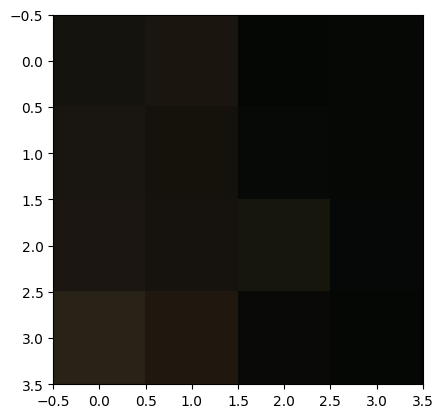

In [ ]:
plt.imshow(xx[1][0])

# ViT

In [ ]:
import math
import torch.nn.functional as F

In [ ]:
class Attention(nn.Module):
  def __init__(self, d):
    super().__init__()
    self.d = d
    self.Q = nn.Linear(d, d)
    self.K = nn.Linear(d, d)
    self.V = nn.Linear(d, d)
  def forward(self, x):
    q = self.Q(x)
    k = self.K(x)
    v = self.V(x)
    score = F.softmax(torch.matmul(q, k.transpose(1, 2)) / math.sqrt(self.d), dim=-1)
    return torch.matmul(score, v)

In [ ]:
x = torch.rand((10, 100, 128)) # b p a
attn = Attention(128)

In [ ]:
a = attn(x)

In [ ]:
a.shape

torch.Size([10, 100, 128])

In [ ]:
from einops.layers.torch import Rearrange

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self, head, d):
    super().__init__()
    self.head = head
    self.d = d
    self.attentions = nn.ModuleList([])
    for _ in range(head):
      self.attentions.append(Attention(d))
    self.Linear = nn.Linear(head * d, d)
  def forward(self, x):
    X = []
    for attention in self.attentions:
      X.append(attention(x))
    X = einops.rearrange(X, 'h b p d -> b p (h d)')
    return self.Linear(X)

In [ ]:
msa = MultiHeadAttention(8, 128)
a = msa(x)
a.shape

torch.Size([10, 100, 128])

In [ ]:
class PositionalEncoding(nn.Module):
  def __init__(self, d, patch):
    super().__init__()
    pe = torch.zeros(patch, d)
    pos = torch.arange(0, patch, dtype=torch.float).unsqueeze(1)
    inv = torch.exp(torch.arange(0, d, 2, dtype=torch.float) * -math.log(10000.) / d)
    pe[:, 0::2] = torch.sin(pos * inv)
    pe[:, 1::2] = torch.cos(pos * inv)
    pe = pe.unsqueeze(0)
    self.register_buffer('pe', pe)
  def forward(self, x):
    return x + self.pe[:, :x.size(1)]

In [ ]:
pos_encoder = PositionalEncoding(128, 100)
ap = pos_encoder(a)

In [ ]:
ap.shape

torch.Size([10, 100, 128])

In [ ]:
class Transformer(nn.Module):
  def __init__(self, d, hidden, head=8, n_MSA=2):
    super().__init__()
    self.norm = nn.LayerNorm(d)
    self.MSAs = nn.ModuleList([])
    for _ in range(n_MSA):
      self.MSAs.append(nn.ModuleList([
          MultiHeadAttention(head, d),
          nn.Linear(d, hidden),
          nn.Linear(hidden, d)
      ]))
  def forward(self, x):
    for msa, fc1, fc2 in self.MSAs:
      x = self.norm(msa(x) + x)
      x = self.norm(fc2(F.relu(fc1(x))) + x)
    return x

In [ ]:
class ViT(nn.Module):
  def __init__(self, image_size=(224, 224), patch_size=(16, 16), channel=3, d=128, classes=1000):
    super().__init__()
    self.patch = nn.Sequential(
        Rearrange('b c (h ph) (w pw) -> b (h w) (ph pw c)', ph=patch_size[0], pw=patch_size[1]),
        nn.Linear(patch_size[0] * patch_size[1] * channel, d)
    )
    patch = (image_size[0] // patch_size[0]) * (image_size[1] // patch_size[1])
    self.position_encoder = PositionalEncoding(d, patch + 1)
    self.cls_token = nn.Parameter(torch.rand(1, 1, d))
    self.transformer = Transformer(d, 2*d)
    self.norm = nn.LayerNorm(d)
    self.fc = nn.Linear(d, classes)
  def forward(self, x):
    x = self.patch(x)
    b, patch, d = x.shape
    cls_tokens = einops.repeat(self.cls_token,'1 p d -> b p d', b=b)
    x = torch.cat((cls_tokens, x), dim=1)
    x = self.position_encoder(x)
    x = self.transformer(x)
    x = x[:, 0]
    x = self.fc(self.norm(x))
    return F.softmax(x, dim=-1)

In [ ]:
vit = ViT()

In [ ]:
x =  torch.rand((10, 3, 224, 224))

In [ ]:
z = vit(x)

In [ ]:
z.shape

torch.Size([10, 1000])